# Computational Social Science Project #2 

Enter your Name: Chuol Ruei Deng, Karla Palos, Hesham Jarmakani,Karla Betel Palos Castellanos,Marwa Abubakr, Simran Kaur 

Semester: Fall 2025


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [6]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [7]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 

diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [8]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape:', diabetes.shape)

shape: (3220, 95)


In [9]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [10]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [11]:
#
# Now do the same as above, but for "Obesity_Number"
# identify non-numeric features
#-----------
# Return rows where the column "Obesity_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 

['No Data']


In [12]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------

# Return rows where the column "Physical_Inactivity_Number"  is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [13]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype("int") 

# Obesity
# ----------
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype("int64") 

# Physical Inactivity
# ----------
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype("int64") 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype("float")

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [14]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)
rc_cols

['Diabetes_Number',
 'Obesity_Number',
 'Physical_Inactivity_Number',
 'race_total population_one race',
 'race_total population_two or more races',
 'race_total population_one race_1',
 'race_total population_one race_white',
 'race_total population_one race_black or african american',
 'race_total population_one race_american indian and alaska native',
 'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
 'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
 'race_total population_one race_american indian and alaska native_navajo tribal grouping',
 'race_total population_one race_american indian and alaska native_sioux tribal grouping',
 'race_total population_one race_asian',
 'race_total population_one race_asian_asian indian',
 'race_total population_one race_asian_chinese',
 'race_total population_one race_asian_filipino',
 'race_total population_one race_asian_japanese',
 'race_total population_one 

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [15]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [16]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_one race_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1']

In [17]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=[
    'race_total population_one race_1',
    'sex and age_total population',
    'hispanic or latino and race_total population',
    'sex and age_total population_18 years and over_1',
    'race_total population_two or more races_1',
    'sex and age_total population_65 years and over_1'
], errors='ignore')

diabetes

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [18]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

Questions to ask for EDA:

How are obesity and physical inactivity related to diabetes rates across counties?

Do older populations (age 65+) tend to have higher diabetes prevalence?

Are there regional disparities in diabetes (e.g., South vs. West)?

Is there a relationship between racial composition and diabetes rates?

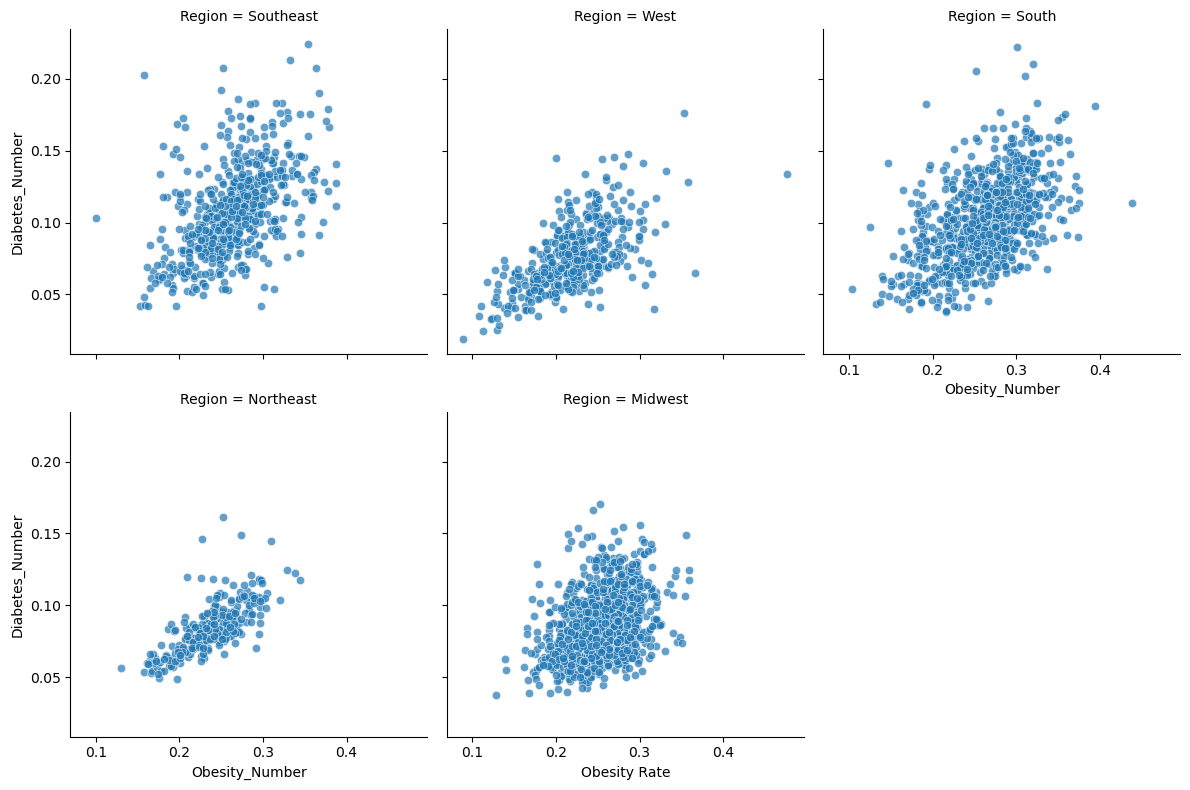

In [19]:
#
# EDA #1 and interpretations in this section 
# Relationship Between Obesity and Diabetes

sns.relplot(
    data=diabetes,
    x='Obesity_Number',
    y='Diabetes_Number',
    col='Region',          
    col_wrap=3,   
    kind='scatter',
    alpha=0.7,
    height=4              
)
plt.xlabel("Obesity Rate")
plt.ylabel("Diabetes Rate")
plt.show()



Interpretation: - 

The data illustrates that counties with higher rates of diabetes also have higher levels of obesity. This positive relationship is consistent with prevailing clinical and public health research. The positive relationship between diabetes rates and obesity can be observed across all regions of the United States. However, diabetes rates and obesity levels appear to be higher in the South and Southeast regions of the United States.

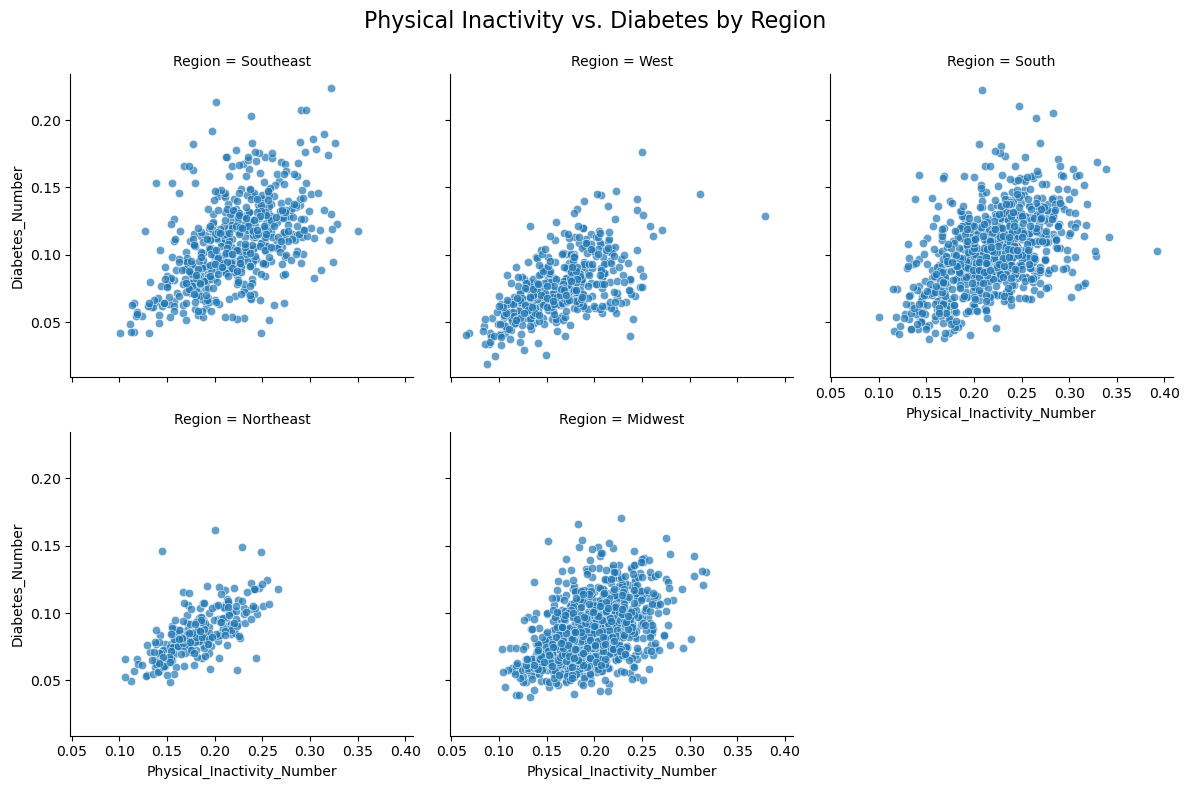

In [20]:
#
# EDA #2 and interpretations in this section 
# Physical Activity and Diabetes

sns.relplot(
    data=diabetes,
    x='Physical_Inactivity_Number',
    y='Diabetes_Number',
    col='Region',          
    col_wrap=3,   
    kind='scatter',
    alpha=0.7,
    height=4              
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Physical Inactivity vs. Diabetes by Region", fontsize=16)
plt.show()



Interpretation: -
The data illustrates that there is a positive relationship between diabetes rates and physical inactivity. That is, counties with less active residents also have a higher prevalence of diabetes. This relationship is observed for counties in all regions of the United States; however, diabetes rates and physical inactivity appears to be more common in the South and Southeast regions of the United States. 

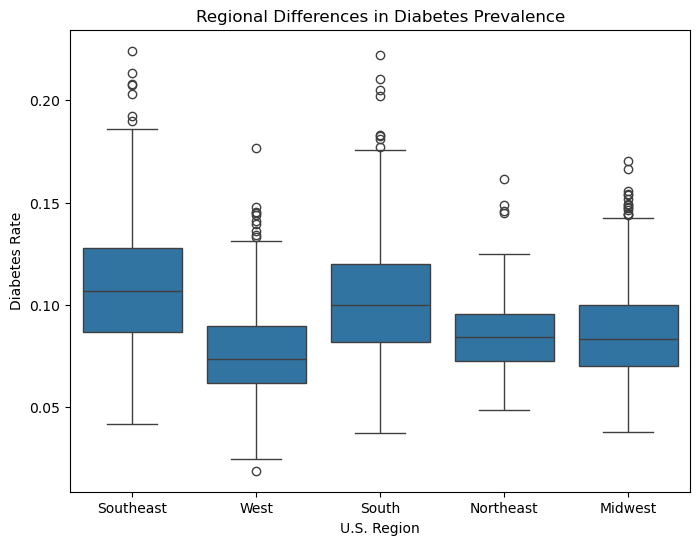

In [21]:
#
# EDA #3 and interpretations in this section 
# Regional Comparison

plt.figure(figsize=(8,6))
sns.boxplot(data=diabetes, x='Region', y='Diabetes_Number')
plt.title("Regional Differences in Diabetes Prevalence")
plt.xlabel("U.S. Region")
plt.ylabel("Diabetes Rate")
plt.show()

Interpretation: 
The data illustrates that median diabetes rates vary by region. The South and Southeast regions of the United States have a higher prevalence of diabetes. Given this regional inequality, policymakers should emphasize diabetes prevention in the southeastern United States. It would be useful to further explore what factors contribute to higher than average median diabetes rates in the South and Southeast. The preceding two figures reveal that rates of obesity and physical inactivity are higher in the South and Southeast. These factors could be contributing to higher rates of diabetes in the South and Southeast. Thus, our team recommends that the new diabetes prevention pilot program should be implemented in the South and Southeast regions of the United States.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [22]:
#
# Drop and Get Dummies
#-----------

# Create dummy variables from the 'Region' column, which might be related to diabetes rates
diabetes_clean = pd.get_dummies(diabetes, 
                                columns=['Region'],  
                                drop_first=True)  # drop the first category as a reference

# Drop 'County' and 'State' columns since they are not useful for analysis
diabetes_clean = diabetes_clean.drop(labels=['County', 'State'], axis=1)  # axis=1 means drop columns

# View the first 10 rows of the new dataframe
diabetes_clean.head(10)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [23]:
#
# Partition data
#-----------

# import library

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(columns=['Diabetes_Number', 
                                 'race alone or in combination with one or more other races_total population'])
X.head()

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or more races,total housing units,citizen - voting age population_citizen - 18 a

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [24]:
#
# Feature selection
#-----------

# We are starting with a very broad X first, and now we want to screen for features to remove. 
# Let's  investigate what we have before we drop 

# Current number of features 
print("shape:", X.shape)

#1) IDS/and labels --> Why do we want to drop it? BEcause IDS don't describe variation in deiabetes, so these can be removed 
id_like = [c for c in X.columns if any(k in c.lower() for k in ["county", "fips", "state", "id"])]
print("ID-like columns:", id_like)

shape: (3112, 89)
ID-like columns: ['CountyFIPS']


In [25]:
#2) Cols with too much missingess --> 
# A variable with too much missing data (our threshold will be>50%) 
# doesn’t have enough information to be useful 
missing = X.isna().mean().sort_values(ascending=False)
print(missing.head(10))

CountyFIPS                                                                          0.0
Obesity_Number                                                                      0.0
Physical_Inactivity_Number                                                          0.0
sex and age_total population_65 years and over_sex ratio (males per 100 females)    0.0
race_total population                                                               0.0
race_total population_one race                                                      0.0
race_total population_two or more races                                             0.0
race_total population_one race_white                                                0.0
race_total population_one race_black or african american                            0.0
race_total population_one race_american indian and alaska native                    0.0
dtype: float64


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

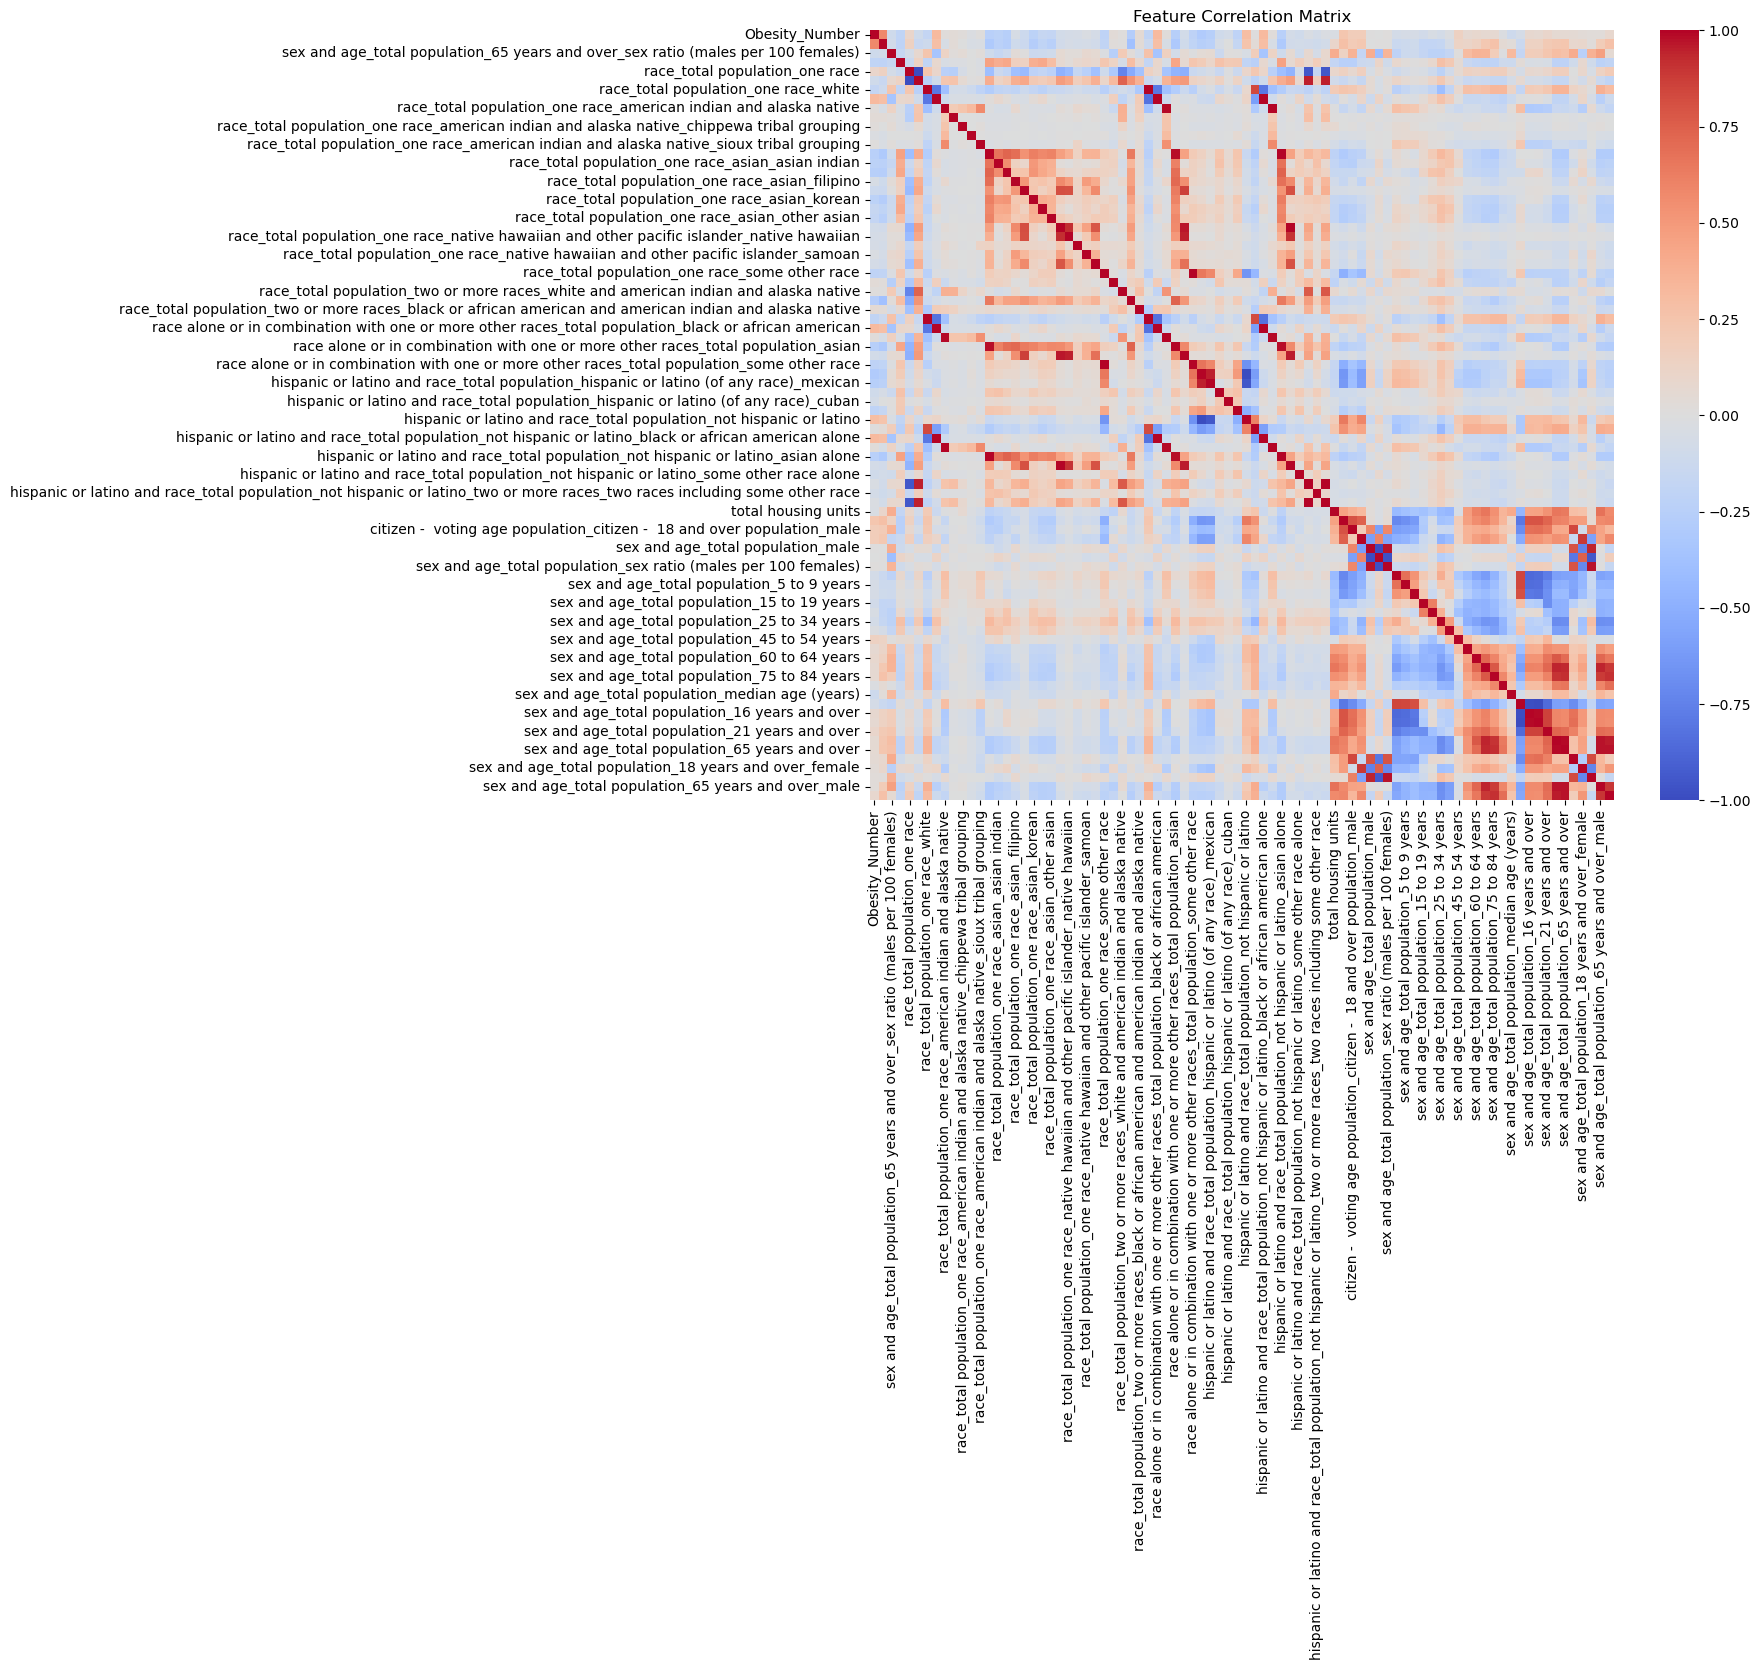

(ρ>0.95): ['race alone or in combination with one or more other races_total population_white', 'race alone or in combination with one or more other races_total population_black or african american', 'race alone or in combination with one or more other races_total population_american indian and alaska native', 'race alone or in combination with one or more other races_total population_asian', 'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander', 'race alone or in combination with one or more other races_total population_some other race', 'hispanic or latino and race_total population_not hispanic or latino_black or african american alone', 'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone', 'hispanic or latino and race_total population_not hispanic or latino_asian alone', 'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and othe

In [29]:
#3) Things that are highly correlated --> 
# Two variables that are almost perfectly correlated tell the model the same thing --> introduce redundancy 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = X.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

#Mathematically... 
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) # checls the columns's correlations with all the featires  above the triangle
high_corr = [col for col in upper.columns if any(upper[col] > 0.95)] # checks the if they are highly correlated with something else. if it is, then it gets assigned here as it is considered a redundant feature
print("(ρ>0.95):", high_corr)

# goal is to remove multicollinearity by removing one variable from anyone pair that carries nearly identifcal information

In [30]:
#
# Feature selection summary: 
# Before splitting the data, we checked for predictors of redundancy and/or low information. 
# We removed cols with labels because they dont't explain variation in diabetes. 
# We removed cols with >50% missing values
# We removed variables that are highly correlated to reduce multicollinearity 
#-----------
# the features used to predict the impact of Obesity and Physical Inactivity on diabetes

X = X.drop(columns=id_like + list(missing[missing > 0.5].index) + high_corr, errors="ignore")
print("Final shape:", X.shape)
X.head()

Final shape: (3112, 70)


,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,total housing units,citizen - voting age population_citizen - 18 and over population,citizen - voting age population_citizen - 18 and over population_male,citizen - voting age population_citizen - 18 and over population_female,sex and age_total population_male,sex and age_total population_female,sex and age_total population_under 5 years,sex and age_total population_5 to 9 years,sex and age_total population_10 to 14 years,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_median age (years),sex and age_total population_under 18 years,sex and age_total population_16 years and over,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,Region_Northeast,Region_South,Region_Southeast,Region_West
0,0.244366,0.226902,76.5,55200

In [31]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.6,      # specify proportional split for training
                                                    test_size=0.4,             # specify proportional split for test
                                                   random_state=10) 

# xtrain = 60% (real training set) 
# xtest = 40% (temporary set)

In [32]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split?

# We already have a clean 60/40 split, so we want to split out 40% temp set. 

X_validate, X_test, y_validate, y_test = train_test_split(X_test,   # this is the 40% temp 
                                                          y_test,
                                                          test_size=0.5,    # half -->  20% validate, 20% test
                                                          random_state=10
)

# breakdown should be 
#60% training (X_train)
#20% validation (X_validate)
#20% test (X_test)

In [33]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

**Ordinary Least Squares (OLS)** is a regression technique that aims to minimize the sum of squared residuals, which are the differences between observed and predicted values, to establish a linear relationship between independent variables and the target variable. Key assumptions of OLS include 
    - the independence of errors
    - homoscedasticitY
    - absence of multicollinearity among predictors.
    
While OLS is simple and interpretable, it is sensitive to outliers and may perform poorly in the presence of multicollinearity or non-linear relationships.

**Ridge regression** addresses multicollinearity by introducing regularization through an L2 penalty in the OLS loss function. This addition helps to prevent large coefficients, thereby mitigating the issue of multicollinearity and helping to reduce overfitting.

**Lasso regression** also incorporates regularization but applies an L1 penalty, which can result in some coefficients being driven to exactly zero. While this feature can lead to simplified models, excessive regularization might eliminate important variables from the analysis.

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  (Linear Regression) 

In [38]:
#
# Model 1 training
#-----------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# Predictions and performance on the training set
y_train_pred_ols = lin_model.predict(X_train)
mse_train_ols = mean_squared_error(y_train, y_train_pred_ols)

print("Ordinary Least Square Training MSE")
print(mse_train_ols)

Ordinary Least Square Training MSE
0.00036977372965621587


#### Model 2:  (Ridge Regression) 

In [39]:
#
# Model 2 training
#-----------

from sklearn.linear_model import Ridge

# make and fit a Ridge regression model
ridge_reg = Ridge()                                              # create the model
ridge_model = ridge_reg.fit(X_train, y_train)                    # fit the model

# Predictions and performance on the training set
y_train_pred_ridge = ridge_model.predict(X_train)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)

print("Ridge Training MSE")
print(mse_train_ridge)

# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T  # create a dataframe from the estimates
ridge_reg_data.columns = ['Coefficient', 'Feature']              # add column names for clarity

Ridge Training MSE
0.0003698316341080596


#### Model 3:  (LASSO) 

In [40]:
#
# Model 3 training
#-----------
# create and fit the model
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.0001, max_iter=15000)  # note the hypterparameter tuning will not converge with max_iter < 15000
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

# Predictions and performance on the training set
y_train_pred_lasso = lasso_model.predict(X_train)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)

print("Lasso Training MSE")
print(mse_train_lasso)

# create a dataframe with the coefficient and feature names for plotting
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T  # create a dataframe from the estimates
lasso_reg_data.columns = ['Coefficient', 'Feature']              # add column names for clarity

Lasso Training MSE
0.00037295731982696725


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

Linear Regression Predictions: 
OLS Validation MSE
0.0004564425704749508


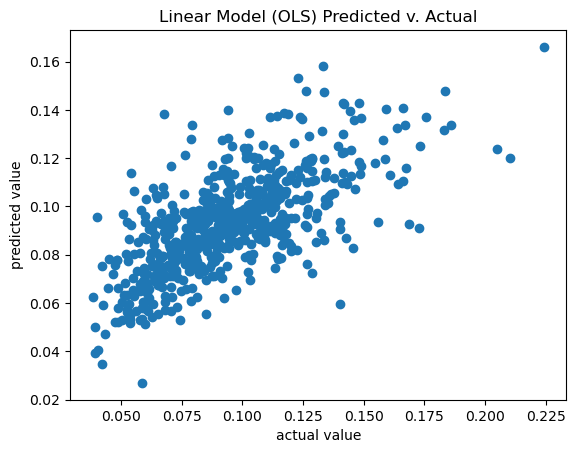

Ridge Regression Predictions: 
Ridge Validation MSE
0.0003698316341080596


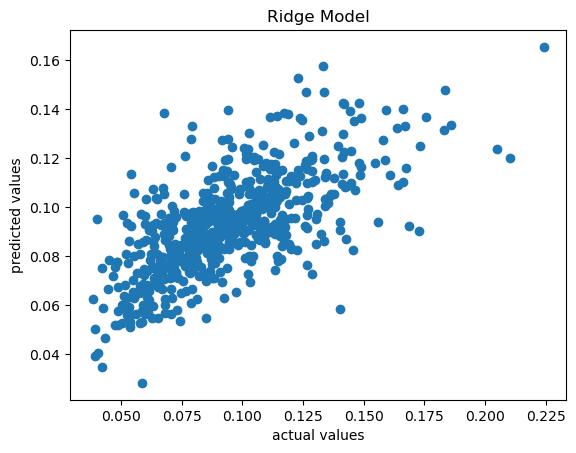

LASSO Prediction: 
Lasso Validation Lasso
0.0004517103973860365


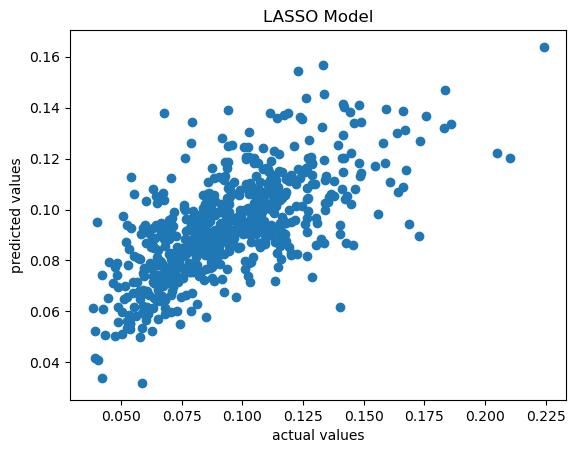

In [43]:
# Predict on validation data
#-----------
from sklearn.metrics import mean_squared_error


print("Linear Regression Predictions: ")
# using the validation dataset and the trained model, predict the number of riders 
y_val_pred_ols = lin_model.predict(X_validate)
mse_val_ols = mean_squared_error(y_validate,y_val_pred_ols )

print("OLS Validation MSE")
print(mse_val_ols)

# plot the residuals on a scatter plot
plt.scatter(y_validate, y_val_pred_ols)                    # specify x and y of the scatter plot
plt.title('Linear Model (OLS) Predicted v. Actual')  # specify plot title
plt.xlabel('actual value')                           # specify x-axis label
plt.ylabel('predicted value')                        # specify y-axis label
plt.show()                                           # show plot

#rmse(lin_pred,     # specify predicted values 
#     y_validate)   # specify actual values values 


print("Ridge Regression Predictions: ")
# use the model to make predictions
y_val_pred_ridge = ridge_model.predict(X_validate)
mse_val_ridge = mean_squared_error(y_validate,y_val_pred_ridge )

print("Ridge Validation MSE")
print(mse_train_ridge)

# plot the predictions
plt.scatter(y_validate, y_val_pred_ridge)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#rmse(ridge_pred, y_validate)

print("LASSO Prediction: ")
# use the model to make predictions
y_val_pred_lasso = lasso_model.predict(X_validate)
mse_val_lasso = mean_squared_error(y_validate,y_val_pred_lasso )

print("Lasso Validation Lasso")
print(mse_val_lasso )


# plot the predictions
plt.scatter(y_validate, y_val_pred_lasso)

# add title and labels
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

lasso_pred = lasso_model.predict(X_validate)

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [44]:
# Predict using your best model
#-----------
#
# Predict on validation data
#-----------
print("Linear Regression Predictions: ")

print("Validation Performance:")
print("---OLS---")
print("MSE")
print(mse_val_ols)

print("---Ridge---")
print("MSE")
print(mse_val_ridge)

print("---LASSO---")
print("MSE")
print(mse_val_lasso)


# the Ridge regression achieved the lowest validation mean squared error (MSE = 0.000369).

y_test_pred_ridge = ridge_model.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge )
print("Ridge Test MSE")
print(mse_test_ridge)

Linear Regression Predictions: 
Validation Performance:
---OLS---
MSE
0.0004564425704749508
---Ridge---
MSE
0.0004553478185093448
---LASSO---
MSE
0.0004517103973860365
Ridge Test MSE
0.00039247982672557623


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [45]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best Ridge model
cv_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_ridge= -cv_scores_ridge.mean()
std_cv_ridge = cv_scores_ridge.std()

print("Cross-Validation Mean MSE")
print(mean_cv_ridge)
print("Lasso Cross-Validation MSE Standard Deviation")
print(std_cv_ridge)

Cross-Validation Mean MSE
0.00040636958793946476
Lasso Cross-Validation MSE Standard Deviation
3.9445207889051486e-05


## 6. Discussion Questions
In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff explains how machine learning models balance simplicity and complexity to make accurate predictions. Bias is the error that comes from incorrect assumptions in the model. For example, in our diabetes analysis, if we use a simple linear regression to predict diabetes rates from obesity and inactivity, the model might miss nonlinear or interactive effects among variables, which leads to systematic underestimation or overestimation of outcomes. Variance, on the other hand, is the error that occurs when a model is too sensitive to the training data. If our model is too flexible, such as including too many predictors or fitting random fluctuations, it might perform very well on the training data but fail to generalize to new counties or years.

This tradeoff is highly relevant to our diabetes modeling because we want a model that captures real patterns in the data without being overly specific to the sample. Linear regression, Lasso, and Ridge all approach this balance differently. While linear regression might have low variance but high bias, Lasso and Ridge use regularization to limit model complexity, reducing variance while keeping bias at an acceptable level. By tuning their parameters, we can prevent overfitting and create a model that performs well across different populations. In public health research, finding this balance is critical, since an overfit model might exaggerate risk in specific counties, while an underfit model might miss meaningful predictors of diabetes.

2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting happens when a machine learning model learns the training data too well, including the noise or random fluctuations that do not represent the true underlying patterns. This makes the model perform very accurately on the training set but poorly on new or unseen data. In the context of our diabetes analysis, overfitting could occur if the model starts memorizing small variations in one county’s data rather than learning general relationships between factors like obesity, inactivity, and diabetes rates. As a result, it would give unreliable predictions for other counties or years, limiting its usefulness for real-world applications.

Overfitting matters because the goal of machine learning is not just to fit the data we have, but to make accurate predictions on data we have not seen. A model that overfits gives a false sense of accuracy and can mislead decision-makers, especially in public health, where policies rely on generalizable insights. To address overfitting, we can use several strategies. In our case, regularization methods like Lasso and Ridge regression add penalties to large or unnecessary coefficients, which helps simplify the model and prevent it from fitting noise. We also use techniques such as cross-validation to test the model’s performance on different subsets of the data, ensuring that it generalizes well. Simplifying the model, removing irrelevant predictors, and collecting more data are additional ways to reduce overfitting and improve the reliability of our predictions.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

Our analysis demonstrates that there multiiple factors can impact whether or not an individual has diabetes. We noticed that obesity and physical inactivity can play a significant role in whether or not an individual can be diagnosed with diabetes. I would priortize the Southeast for a pilot program due to the relatively higher diabetes rate as noticed in our exploratory analysis.

In a real world application - taking into account features like race and/or gender - I wouldn't be surprised if we noticed a similar (if not higher) rate of diabetes in the Southeast. Southeastern American states are known for being very diverse, with a large Black and Brown population, and for many patterns of systemic racism that exist to this day, especially around nutrition (e.g., the impact of redlining on the formation of food deserts).  